In [215]:
# GDP Growth Forecasting in Argentina
 
# This notebook aims to predict the growth of Argentina's GDP using a Linear Regression model. It will start with a single variable and then include more variables to improve the model.
# This is the first part of a series of notebooks that will explore different models and techniques to predict the GDP growth of Argentina.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Change cientific to numeric format
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Read csv with GDP data
gdp_data = pd.read_csv('../data/raw/annual_gdp_constant_dollars.csv')

In [5]:
# First glance of csv, check everything is in order. Keep in mind data was cleaned before.
gdp_data.head()

,Year,GDP
0,1990 [YR1990],141352654305.16
1,1991 [YR1991],189719984268.49
2,1992 [YR1992],228778917308.17
3,1993 [YR1993],236741715015.02
4,1994 [YR1994],257440000000.00


In [6]:
# Better Year format
gdp_data['Year'] = gdp_data['Year'].str.extract(r'(\d{4})')

In [7]:
# Define the folder path where we want to save the file
folder_path = '../data/modified'
file_path = os.path.join(folder_path, 'annual_gdp_constant_dollars_modified.csv')

In [8]:
# Save csv with new format
gdp_data.to_csv(file_path, index=False)

In [9]:
# Check modified csv
gdp_data.head()

,Year,GDP
0,1990,141352654305.16
1,1991,189719984268.49
2,1992,228778917308.17
3,1993,236741715015.02
4,1994,257440000000.00


In [10]:
# Check number of rows and columns
print(f"Dataset contains {gdp_data.shape[0]} rows and {gdp_data.shape[1]} columns.")

Dataset contains 34 rows and 2 columns.


In [11]:
# Check any missing values
print(gdp_data.isnull().sum())

Year    0
GDP     0
dtype: int64


In [12]:
# Check data types
gdp_data.dtypes

Year     object
GDP     float64
dtype: object

In [13]:
# Change data types
gdp_data['Year'] = gdp_data['Year'].astype(int)
gdp_data['GDP'] = gdp_data['GDP'].astype(float)

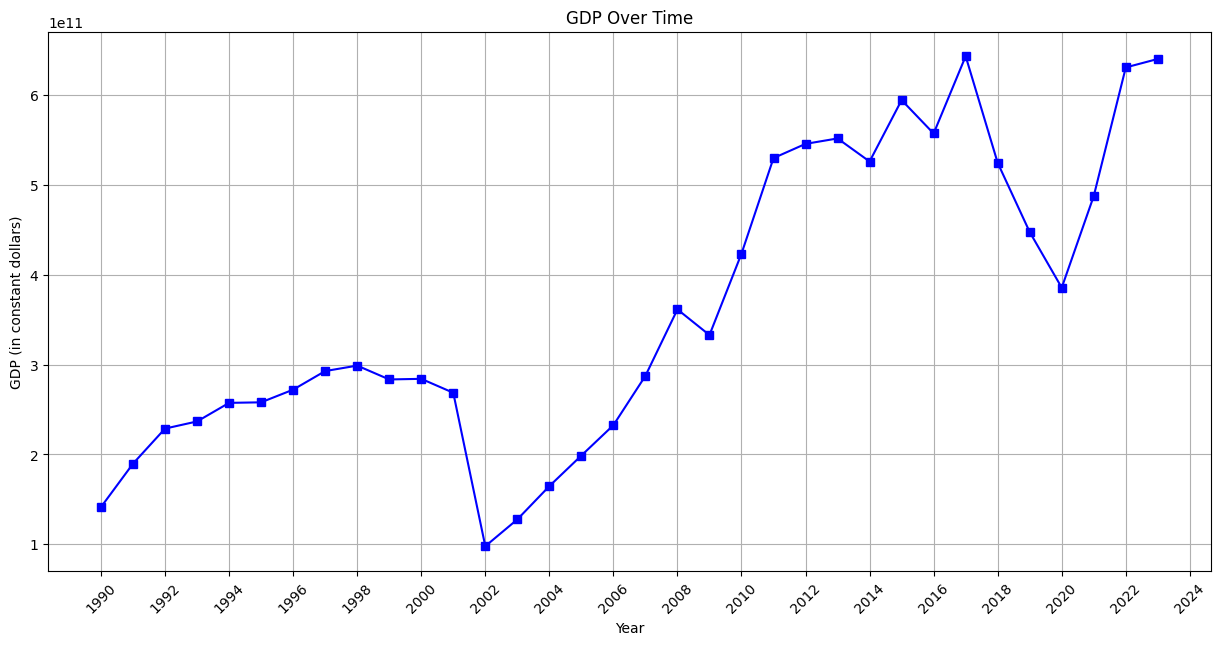

In [14]:
# Plot GDP over time
plt.figure(figsize=(15, 7))
plt.plot(gdp_data['Year'], gdp_data['GDP'], marker='s', color='b')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in constant dollars)')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)
plt.show()

In [15]:
# Show specific statistics for GDP
gdp_data.describe()

,Year,GDP
count,34.00,34.00
mean,2006.50,361992323525.53
std,9.96,163846233977.50
min,1990.00,97724004251.86
25%,1998.25,241916286261.26
50%,2006.50,295903625000.00
75%,2014.75,525944728388.78
max,2023.00,643628393281.36


In [16]:
# Splitting data into training and testing sets. Training set (80%) and testing set (20%).
X = gdp_data[['Year']].values.reshape(-1, 1)
y = gdp_data['GDP'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Training the simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluating the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 1.1144006770937483e+22
R^2 Score: 0.513682270311956


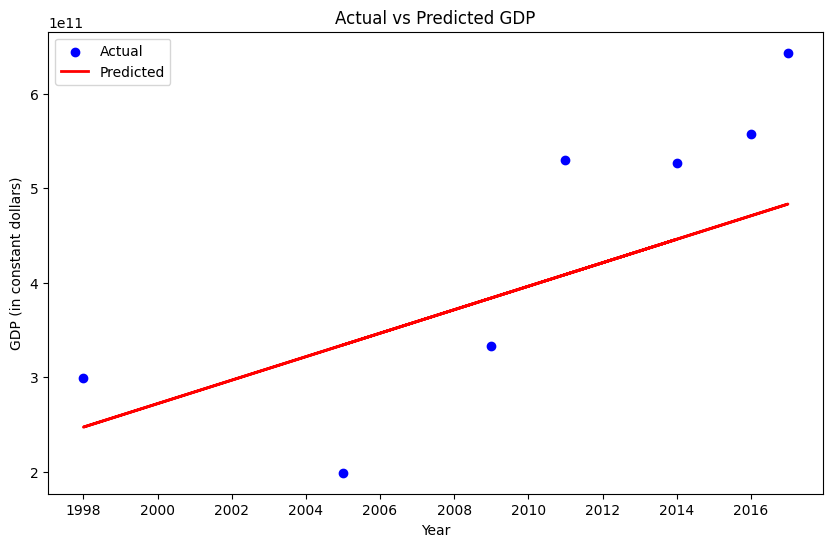

In [20]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP (in constant dollars)')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.legend()
plt.show()

In [21]:
# Results
# The R² score of 0.514 suggests that the model explains about 51.4% of the variance in GDP, this is not a great score but it is a start.
# The Mean squared error of 1.1144x10^22 is quite high, this means that the model is not very accurate in predicting the GDP values.
# The plot shows that the model is not very accurate in predicting the GDP values, it is clear that the model is underfitting the data.
# All of this is expected since we are using a simple linear regression model with only one variable. The model can be improved by including more variables and using more advanced techniques.